In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/ai-incident-database/mongodump/incidents.csv', index_col=['incident_id'],
                parse_dates=['date']).drop(columns=['_id']).sort_index()
df.columns = ['date', 'reports', 'deployer', 'developer', 'harmed', 'description', 'title', ]
df['year'] = df['date'].dt.year
df.head()

,date,reports,deployer,developer,harmed,description,title,year
incident_id,,,,,,,,
1,2015-05-19,"[1,2,3,4,5,6,7,8,9,10,11,12,14,15]","[""youtube""]","[""youtube""]","[""children""]",YouTube’s content filtering and recommendation...,Google’s YouTube Kids App Presents Inappropria...,2015
2,2018-12-05,"[139,141,142,143,144,145,146,148,149,150,151,1...","[""amazon""]","[""amazon""]","[""warehouse-workers""]",Twenty-four Amazon workers in New Jersey were ...,Warehouse robot ruptures can of bear spray and...,2018
3,2018-10-27,"[372,373,374,375,376,377,378,379,380,381,382,3...","[""boeing""]","[""boeing""]","[""airplane-passengers"",""airplane-crew""]","A Boeing 737 crashed into the sea, killing 189...",Crashes with Maneuvering Characteristics Augme...,2018
4,2018-03-18,"[629,630,631,632,633,634,635,636,637,638,639,6...","[""uber""]","[""uber""]","[""elaine-herzberg"",""pedestrians""]",An Uber autonomous vehicle (AV) in autonomous ...,Uber AV Killed Pedestrian in Arizona,2018
5,2015-07-13,"[767,768,769,770,771,772,773,774,775,776,777,778]","[""hospitals"",""doctors""]","[""intuitive-surgical""]","[""patients""]",Study on database reports of robotic surgery m...,Collection of Robotic Surgery Malfunctions,2015


In [2]:
from plotly.express import parallel_categories
from ast import literal_eval
deployers, harmeds, years = [], [], []
for index, row in df.iterrows():
    year = row['year']
    if year == 2015:
        for deployer in literal_eval(row['deployer']):
            for harmed in literal_eval(row['harmed']):
                deployers.append(deployer)
                harmeds.append(harmed)
                years.append(year)
parallel_categories(data_frame=pd.DataFrame(data={'deployer': deployers, 'harmed': harmeds, 'year': years}),
                   dimensions=['deployer', 'harmed'], color='year', height=600, ).update_coloraxes(showscale=False).show()
    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 1 to 524
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         514 non-null    datetime64[ns]
 1   reports      514 non-null    object        
 2   deployer     514 non-null    object        
 3   developer    514 non-null    object        
 4   harmed       514 non-null    object        
 5   description  514 non-null    object        
 6   title        514 non-null    object        
 7   year         514 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 34.1+ KB


In [4]:
from plotly.express import histogram
histogram(data_frame=df, x='year')

In [5]:
from plotly.express import strip
strip(data_frame=df, x='date', hover_name='title')

(-0.5, 1199.5, 1199.5, -0.5)

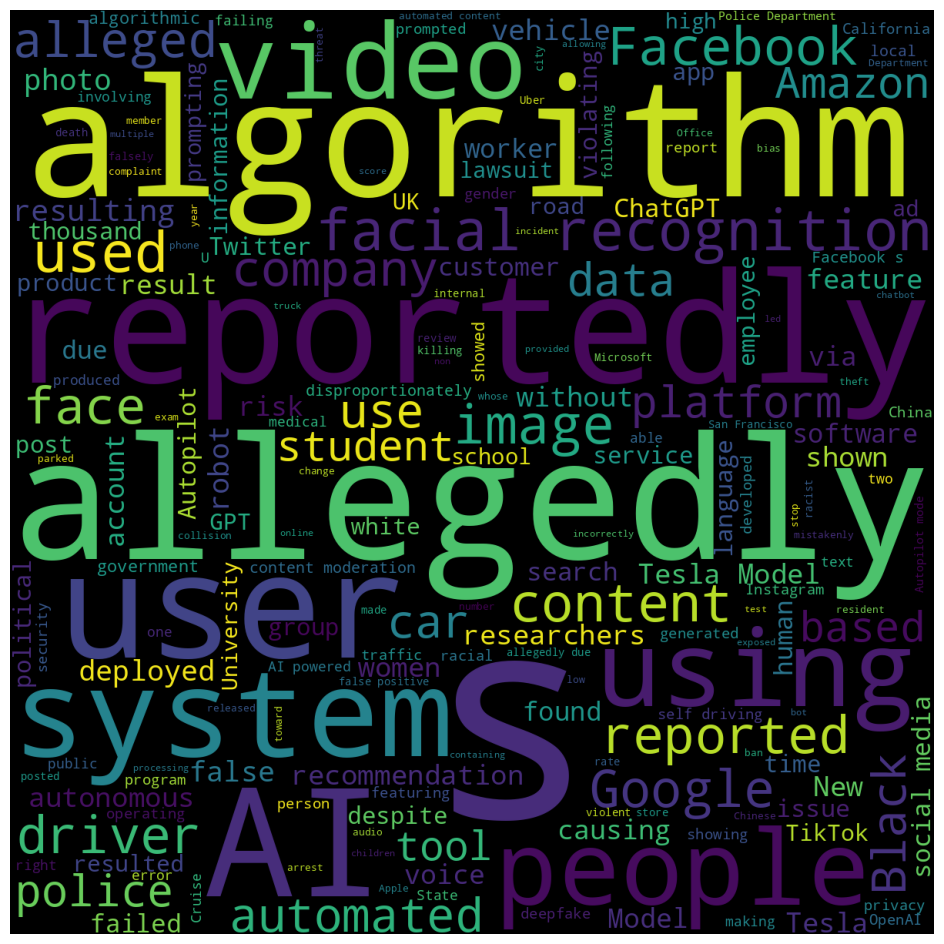

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['description'].values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

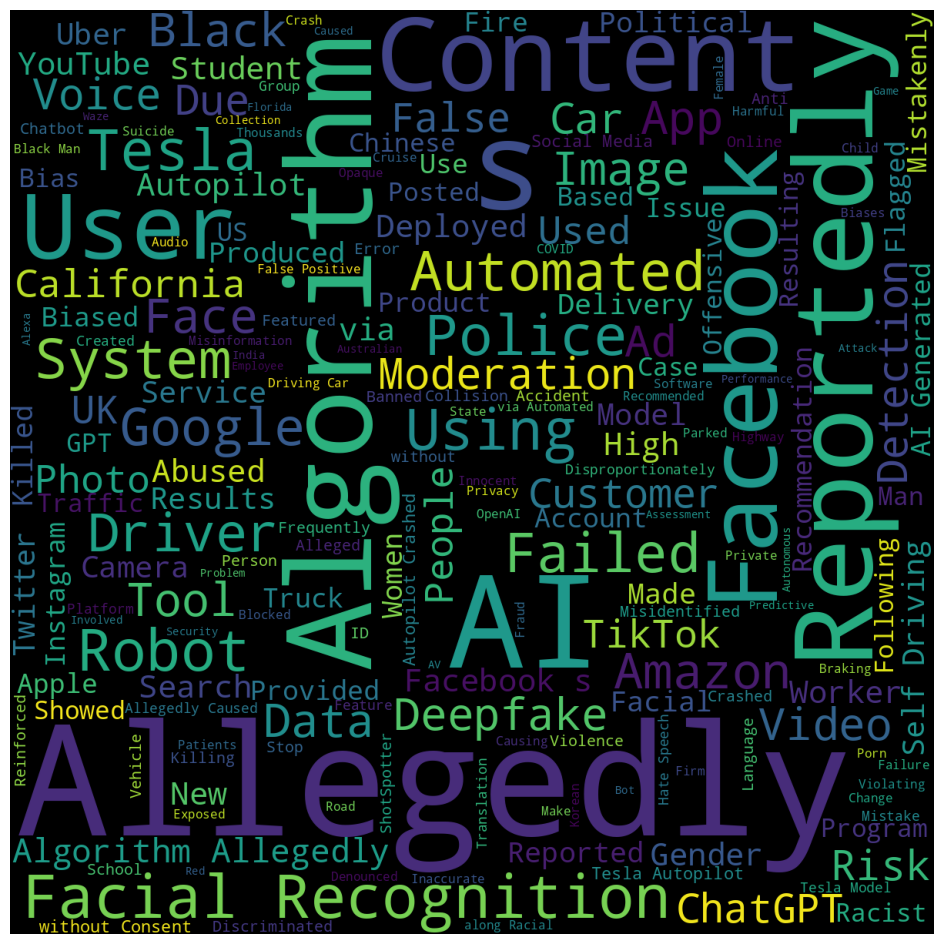

In [7]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=' '.join(df['title'].values), ))
axis('off')